## Grid refinement study for the flow around an obstacle

In [22]:
import lettuce as lt
from matplotlib import pyplot as plt
import numpy as np
import torch

In [57]:
def run(ny=500, *axes):
    
    ny=500
    lattice = lt.Lattice(lt.D2Q9, device="cuda", dtype=torch.float64)
    #flow = lt.Obstacle(
    #    (2*ny, ny),
    #    reynolds_number=50.0,
    #    mach_number=0.05,
    #    lattice=lattice,
    #    domain_length_x=10.1,
    #)
    #x, y = flow.grid
    
    #flow.mask = ((x >= 2) & (x < 3) &  (y >= x) & (y <= 3))
    #from lettuce import Lattice, D2Q9
    flow = lt.Obstacle(
        shape=(101, 51),
        reynolds_number=100,
        mach_number=0.05,
        lattice=lattice,
        domain_length_x=10.1
    )
    x, y = flow.grid
    condition = np.sqrt((x-2.5)**2+(y-2.5)**2) < 0.5
    flow.mask[np.where(condition)] = 1
    
    axes[0].imshow(flow.mask.T, origin="lower")
    
    tau = flow.units.relaxation_parameter_lu 
    sim = lt.Simulation(flow, lattice, lt.RegularizedCollision(lattice, tau), 
                        lt.StandardStreaming(lattice))
    sim.step(1)
    u = flow.units.convert_velocity_to_pu(lattice.u(sim.f).detach().cpu().numpy())
    return axes[1].imshow(u[0,...].T, origin="lower")
    print("Max Velocity:", u.max())

In [58]:
def run_and_plot(n):
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    fig.subplots_adjust(right=0.85)
    im2 = run(n, *axes)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)

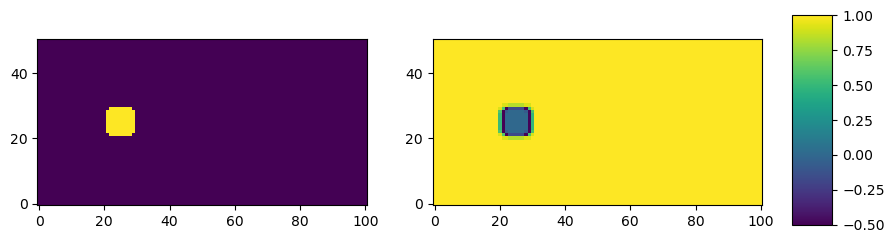

In [59]:
run_and_plot(1)

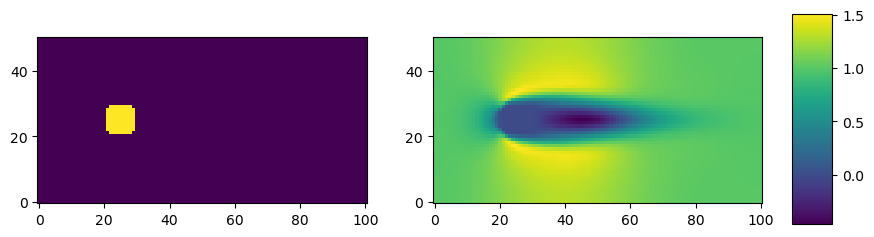

In [52]:
run_and_plot(25)

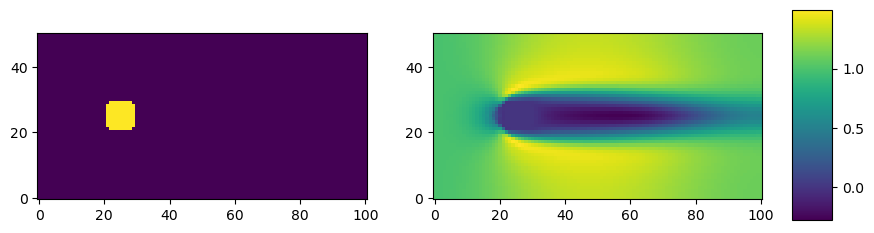

In [48]:
run_and_plot(50)

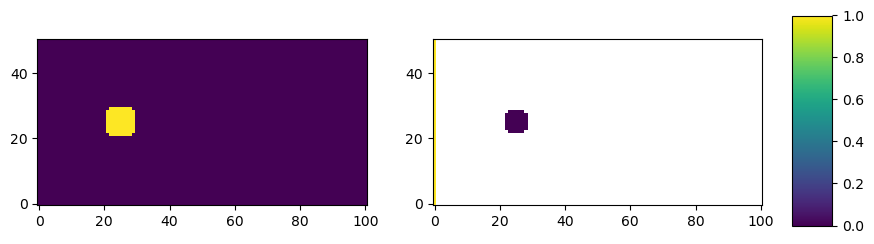

In [49]:
run_and_plot(100)

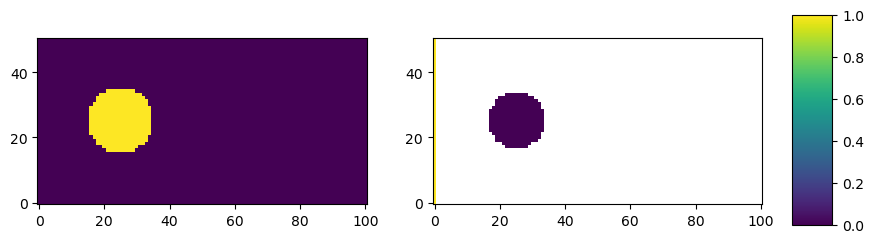

In [17]:
run_and_plot(500)